# Perform indic
https://forum.datafin.fr/t/perform-indic/68

## Introduction

Proposer des **outils d’évaluation de la performance** des politiques publiques et de présentation des résultats à partir des **objectifs et des indicateurs de performance existants**, **des données budgétaires et comptables**, des recommandations de la Cour des comptes et de toutes autres bases de données pertinentes.

L’enjeu est d’exploiter des bases de données diversifiées pour enrichir **l’analyse de le performance**. Il est par ailleurs de mettre en valeur les résultats de performance pour le grand public.

## Descriptive Analysis 

- data source 
- data 
- columns

```
- 'Année RAP', 
- 'Type de Budget (Hors Budgets annexes)',
- 'Code Ministère au 1er janvier 2017', 
- 'Ministère au 1er janvier 2017',
- 'Code Programme'
- 'Programme'
- 'Code Action'
- 'Action'
-'T1 EXEC AE 2017'
-'T2 EXEC AE 2017'
-'T3 EXEC AE 2017'
-'T4 EXEC AE 2017' 
-'T5 EXEC AE 2017'
-'T6 EXEC AE 2017',
-'T7 EXEC AE 2017'

```

In [23]:
#!jupyter nbextension enable --py --sys-prefix qgrid

Enabling notebook extension qgrid/extension...
      - Validating: OK


In [143]:
import pandas as pd 
import qgrid
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
#set_style("whitegrid")
#sns.set(rc={'figure.figsize':(11.7,8.27),'style':'whitegrid'})
#sns.set(style="whitegrid", font_scale=1.5)
sns.set_style("whitegrid", {"axes.grid": False})

In [347]:
PLR2017_Exec_Min_AE_BG=pd.read_csv("../data/PLR2017-Exec-Min_AE-BG.csv",encoding='latin-1',sep=';')

In [348]:
PLR2017_Exec_Min_AE_BG.columns

Index(['Année RAP', 'Type de Budget (Hors Budgets annexes)',
       'Code Ministère au 1er janvier 2017', 'Ministère au 1er janvier 2017',
       'Code Programme', 'Programme', 'Code Action', 'Action',
       'T1 EXEC AE 2017', 'T2 EXEC AE 2017', 'T3 EXEC AE 2017',
       'T4 EXEC AE 2017', 'T5 EXEC AE 2017', 'T6 EXEC AE 2017',
       'T7 EXEC AE 2017'],
      dtype='object')

In [349]:
tmp=qgrid.show_grid(PLR2017_Exec_Min_AE_BG,show_toolbar=True)
tmp

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8}, precision=5, show_toolbar=True)

In [350]:
def get_percentage_missing(series,thres=0.5):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    perc=round(num/den, 2)[0]
    if perc>thres:
        label='greater'
    else:
        label='lower'
    res=pd.DataFrame(round(num/den, 2))
    res['label']=label
    return res


def visualize_na(dt,threshold=0.3):
    '''
    visualize percentage Na  
    '''
    colors = ['red','green']
    col_names=PLR2017_Exec_Min_AE_BG.columns
    sns.color_palette(colors)
    res=pd.DataFrame()
    for col in col_names:
        df=get_percentage_missing(dt[[col]],threshold)
        df.reset_index(level=0, inplace=True)
        df.columns=['Column','Percent_Na','Label']
    
        res=pd.concat([res,df])
        
    res=res.sort_values(['Percent_Na'],ascending=0)
                            
    ax = sns.barplot( y='Column',x="Percent_Na",hue='Label',data=res,
                  linewidth=1.5,
                     palette=sns.color_palette(colors),
                     alpha=0.5,
                     ci=None,
                    
                  errcolor=".9", edgecolor=".7")
    ax.set_title("Nas' percentage rate by column\n\n threshold = {}".format(threshold))
    plt.show()
    return res[res['Label'] == 'greater'].Column


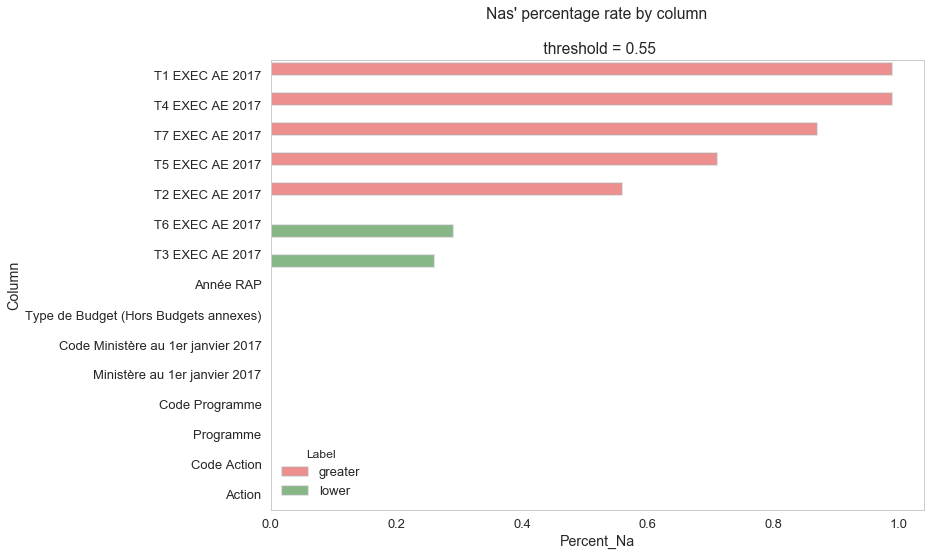

In [351]:
#Delete row that have more than 55% of NA 
res=visualize_na(PLR2017_Exec_Min_AE_BG,threshold=0.55)

In [352]:
PLR2017_Exec_Min_AE_BG.drop(res.get_values(), axis = 1, inplace = True)


,Année RAP,Type de Budget (Hors Budgets annexes),Code Ministère au 1er janvier 2017,Ministère au 1er janvier 2017,Code Programme,Programme,Code Action,Action,T3 EXEC AE 2017,T6 EXEC AE 2017
0,2017,Budget général,MIN01,Affaires étrangères et développement internati...,105,Action de la France en Europe et dans le monde,1,Coordination de l'action diplomatique,16 443 780,2 988 710
1,2017,Budget général,MIN01,Affaires étrangères et développement internati...,105,Action de la France en Europe et dans le monde,2,Action européenne,9 304,41 022 683
2,2017,Budget général,MIN01,Affaires étrangères et développement internati...,105,Action de la France en Europe et dans le monde,4,Contributions internationales,NaN,679 835 628
3,2017,Budget général,MIN01,Affaires étrangères et développement internati...,105,Action de la France en Europe et dans le monde,5,Coopération de sécurité et de défense,5 164 438,20 539 534
4,2017,Budget général,MIN01,Affaires étrangères et développement internati...,105,Action de la France en Europe et dans le monde,6,Soutien,115 182 115,133 101


In [368]:
cols=['Année RAP',
      'Type de Budget (Hors Budgets annexes)',
      'Ministère au 1er janvier 2017',
                                'Programme',#redondant Code Programme, et
                                #'Code Ministère au 1er janvier 2017',
                                #'Code Programme',
      'Action',#redondant Code Action
                                'T3 EXEC AE 2017','T6 EXEC AE 2017']

In [369]:
PLR2017_Exec_Min_AE_BG[cols].groupby(['Année RAP',
                                      'Type de Budget (Hors Budgets annexes)',
                                      'Ministère au 1er janvier 2017',
                                'Programme',
                                'Action']).sum()

T3 EXEC AE 2017  \
Année RAP Type de Budget (Hors Budgets annexes) Ministère au 1er janvier 2017                      Programme                                          Action                                                               
2017      Budget général                        Affaires sociales et santé                         Conduite et soutien des politiques sanitaires, ... Affaires européennes et internationales                    428 765   
                                                                                                                                                      Affaires immobilières                                   42 671 707   
                                                                                                                                                      Communication                                            3 949 054   
                                                                                                                                                      Financement des agences régionales de santé            552 886 645   
                                                                                                                                                      Fonctionnement des services                             15 256 727   
                                                                                                                                                      Personnels mettant en oeuvre les politiques du ...               0   
                                                                                                                                                      Personnels mettant en oeuvre les politiques pou...               0   
                                                                                                                                                      Personnels mettant en oeuvre les politiques soc...               0   
                                                                                                                                                      Personnels mettant en uvre les politiques de l...               0   
                                                                                                                                                      Personnels transversaux et de soutien                            0   
                                                                                                                                                      Politique des ressources humaines                       25 384 756   
                                                                                                                                                      Statistiques, études et recherche                        5 908 615   
                                                                                                                                                      Systèmes d'information                                  48 589 477   
                                                                                                   Handicap et dépendance                             Allocations et aides en faveur des personnes ha...       1 164 288   
                                                                                                                                                      Fonctionnement des maisons départementales des ...               0   
                                                                                                                                                      Pilotage du programme et animation des politiqu...         533 124   
                                                                                                   Inclusion sociale et protection des personnes      Aide alimentaire                                        17 444 132   
                     

In [454]:
#Repartition budget par ministere/ programme/action for each TN EXCEC AE 2017
df=PLR2017_Exec_Min_AE_BG[['Ministère au 1er janvier 2017','T3 EXEC AE 2017','T6 EXEC AE 2017']]

In [466]:
PLR2017_Exec_Min_AE_BG.shape

(562, 10)

In [455]:
df=df.fillna(0)

In [459]:
def sanitize(x):
    if isinstance(x,int):
        return x 
    else:
        x=x.replace(" ","")
        if str.isdigit(x):
            return int(x)
            

In [460]:
#list(map(sanitize,df['T3 EXEC AE 2017'].values))

In [461]:
df['T3 EXEC AE 2017'] = df['T3 EXEC AE 2017'].map(sanitize)
df['T6 EXEC AE 2017']=df['T6 EXEC AE 2017'].map(sanitize)


In [462]:
df.head(10)

,Ministère au 1er janvier 2017,T3 EXEC AE 2017,T6 EXEC AE 2017
0,Affaires étrangères et développement internati...,16443780.0,2988710.0
1,Affaires étrangères et développement internati...,9304.0,41022683.0
2,Affaires étrangères et développement internati...,0.0,679835628.0
3,Affaires étrangères et développement internati...,5164438.0,20539534.0
4,Affaires étrangères et développement internati...,115182115.0,133101.0
5,Affaires étrangères et développement internati...,211450238.0,427618.0
6,Affaires étrangères et développement internati...,21573546.0,15581685.0
7,Affaires étrangères et développement internati...,0.0,99200000.0
8,Affaires étrangères et développement internati...,191197.0,0.0
9,Affaires étrangères et développement internati...,42647380.0,2787804.0


In [487]:
#Number of programm by minister 
nbProject_ministere=df.groupby('Ministère au 1er janvier 2017')['Ministère au 1er janvier 2017'].count()


In [488]:
nbProject_ministere=pd.DataFrame(nbProject_ministere)
nbProject_ministere.columns=['Freq']
tot_project=nbProject_ministere['Freq'].sum()
nbProject_ministere.reset_index(level=0, inplace=True)
nbProject_ministere['Percent']=nbProject_ministere.Freq.map(lambda x : x*100/tot_project)
#nbProject_ministere.columns=['Ministère au 1er janvier 2017','Count']

In [498]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go



In [499]:
#nI7uqsnn2D85DTXabjZb
labels = nbProject_ministere['Ministère au 1er janvier 2017']
values = nbProject_ministere['Freq']

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Skilly/0 or inside your plot.ly account where it is named 'basic_pie_chart'


In [491]:
nbProject_ministere.columns

Index(['Ministère au 1er janvier 2017', 'Freq', 'Percent'], dtype='object')

In [445]:
df2=df.groupby('Ministère au 1er janvier 2017').sum()
df2

,T3 EXEC AE 2017
Ministère au 1er janvier 2017,
Affaires sociales et santé,1.062628e+09
Affaires étrangères et développement international,8.643667e+08
"Agriculture, agroalimentaire et forêt",1.546722e+09
"Aménagement du territoire, ruralité et collectivités territoriales",1.342000e+03
Culture et communication,1.304005e+09
Défense,1.406369e+10
"Environnement, énergie et mer",3.089959e+09
"Familles, enfance et droits des femmes",1.238277e+06
Fonction publique,1.591327e+08


In [446]:
df2.sort_values(by='T3 EXEC AE 2017',ascending=0)

,T3 EXEC AE 2017
Ministère au 1er janvier 2017,
"Éducation nationale, enseignement supérieur et recherche",1.927446e+10
Défense,1.406369e+10
Économie et finances,7.783806e+09
Intérieur,3.746388e+09
"Environnement, énergie et mer",3.089959e+09
Justice,2.523555e+09
"Travail, emploi, formation professionnelle et dialogue social",1.711369e+09
"Agriculture, agroalimentaire et forêt",1.546722e+09
Services du Premier ministre,1.526427e+09


In [447]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools



In [330]:
PLR2017_Exec_Min_AE_BG.columns[]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [300]:
#pd.DataFrame(PLR2017_Exec_Min_AE_BG['Code Ministère au 1er janvier 2017'].value_counts())

,Code Ministère au 1er janvier 2017
MIN06,79
MIN07,74
MIN23,62
MIN12,61
MIN70,50
MIN09,48
MIN56,32
MIN03,25
MIN10,24
MIN02,23


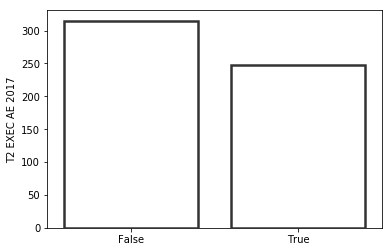

In [39]:
ax = sns.barplot( x=['False', 'True'],y="T2 EXEC AE 2017", data=tmp,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")

In [10]:
PLR2017_Exec_Min_AE_BG.isnull().count()
summary=PLR2017_Exec_Min_AE_BG.describe()
print(summary)

       Année RAP  Code Programme  Code Action  T1 EXEC AE 2017
count      562.0      562.000000   562.000000     7.000000e+00
mean      2017.0      192.667260     8.327402     1.415600e+08
std          0.0       75.628499    10.901745     2.014285e+08
min       2017.0      101.000000     1.000000     8.615000e+05
25%       2017.0      141.000000     2.000000     1.516907e+07
50%       2017.0      176.000000     5.000000     1.824600e+07
75%       2017.0      214.000000    11.000000     2.117923e+08
max       2017.0      541.000000    67.000000     5.178900e+08


In [41]:
PLR2017_Exec_Min_AE_BG.isnull().count()

Année RAP                                562
Type de Budget (Hors Budgets annexes)    562
Code Ministère au 1er janvier 2017       562
Ministère au 1er janvier 2017            562
Code Programme                           562
Programme                                562
Code Action                              562
Action                                   562
T1 EXEC AE 2017                          562
T2 EXEC AE 2017                          562
T3 EXEC AE 2017                          562
T4 EXEC AE 2017                          562
T5 EXEC AE 2017                          562
T6 EXEC AE 2017                          562
T7 EXEC AE 2017                          562
dtype: int64

In [12]:
PLR2017_Exec_Min_AE_BG.shape

(562, 15)